Sampling Rate (fs): 1.00e+11 Hz
Sample Period (Ts): 1.00e-11 s
Transmitter Linewidth: 5.00e+04 Hz
LO Linewidth: 5.00e+04 Hz
Total Linewidth (Δν): 1.00e+05 Hz
Phase Noise Variance per Sample (σ²): 6.28e-06 rad²
Standard Deviation per Sample (σ): 2.51e-03 rad


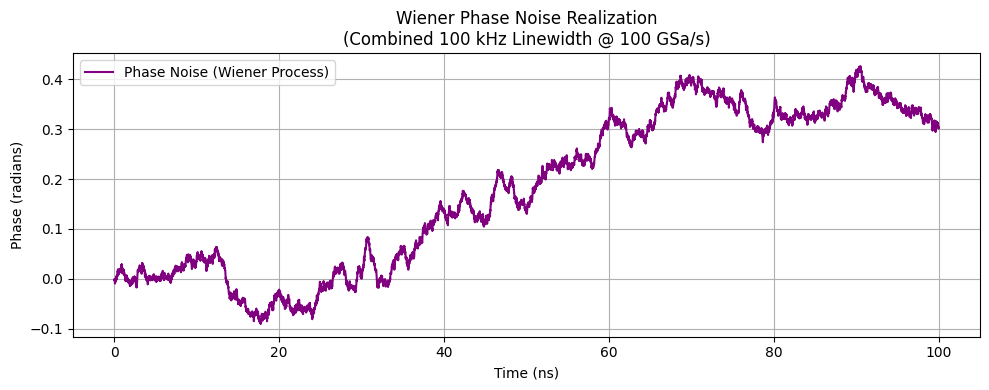

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
fs = 100e9              # Sampling rate in Hz (100 GSa/s)
delta_nu_tx = 50e3      # Transmitter linewidth in Hz
delta_nu_lo = 50e3      # LO linewidth in Hz
delta_nu_total = delta_nu_tx + delta_nu_lo  # Combined linewidth
Ts = 1 / fs             # Sampling period (s)
sigma2 = 2 * np.pi * delta_nu_total * Ts    # Phase noise variance per sample

# --- Print calculation results ---
print("Sampling Rate (fs): {:.2e} Hz".format(fs))
print("Sample Period (Ts): {:.2e} s".format(Ts))
print("Transmitter Linewidth: {:.2e} Hz".format(delta_nu_tx))
print("LO Linewidth: {:.2e} Hz".format(delta_nu_lo))
print("Total Linewidth (Δν): {:.2e} Hz".format(delta_nu_total))
print("Phase Noise Variance per Sample (σ²): {:.2e} rad²".format(sigma2))
print("Standard Deviation per Sample (σ): {:.2e} rad".format(np.sqrt(sigma2)))

# --- Generate Phase Noise (Wiener Process) ---
num_samples = 10000  # Number of samples to simulate
delta_theta = np.random.normal(0, np.sqrt(sigma2), num_samples)
theta = np.cumsum(delta_theta)

# --- Time Axis ---
time_ns = np.arange(num_samples) * Ts * 1e9  # Convert to nanoseconds

# --- Plot Phase Noise ---
plt.figure(figsize=(10, 4))
plt.plot(time_ns, theta, label='Phase Noise (Wiener Process)', color='purple')
plt.title('Wiener Phase Noise Realization\n(Combined 100 kHz Linewidth @ 100 GSa/s)')
plt.xlabel('Time (ns)')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
